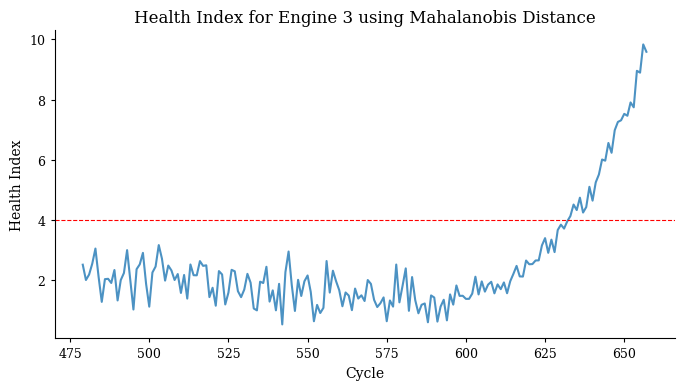

In [28]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Custom minimalist plot style
plt.rcParams.update({
    'font.family': 'serif',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.linewidth': 0.8,
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9
})

# Load data
df = pd.read_csv("train_FD001.txt", sep="\s+", header=None)
df.dropna(axis=1, inplace=True)
df.columns = ['unit', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + [f'sensor_{i}' for i in range(1, 22)]



selected_sensors = ['sensor_9', 'sensor_14', 'sensor_4', 'sensor_3', 'sensor_17', 'sensor_2']

# -----------------------------
# PCA
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_sensors])
pca = PCA(n_components=3)
pca_factors = pca.fit_transform(X_scaled)
df[['pca_1', 'pca_2', 'pca_3']] = pca_factors


# Calculate Mahalanobis distance from the origin
df["distance"] = np.sqrt(df["pca_1"]**2 + df["pca_2"]**2 + df["pca_3"]**2)


plt.figure(figsize=(8, 4))
plt.plot(df[df["unit"] == 3]["distance"], alpha=0.8)
plt.title('Health Index for Engine 3 using Mahalanobis Distance')
plt.xlabel('Cycle')
plt.ylabel('Health Index')
plt.axhline(4, color='red', linestyle='--', linewidth=0.8, label='Threshold')

plt.savefig("health_index.png")
plt.show()

In [41]:
count = df[df["unit"] == 78]["distance"]>4

In [42]:
sum(count)

4

In [29]:
df["unit"].nunique()

100

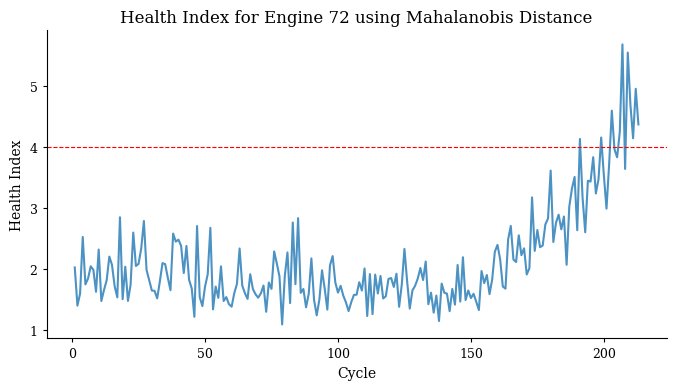

In [40]:

plt.figure(figsize=(8, 4))
plt.plot(df[df["unit"] == 72]["time"], df[df["unit"] == 72]["distance"], alpha=0.8)
plt.title('Health Index for Engine 72 using Mahalanobis Distance')
plt.xlabel('Cycle')
plt.ylabel('Health Index')
plt.axhline(4, color='red', linestyle='--', linewidth=0.8, label='Threshold')

plt.savefig("health_index.png")
plt.show()

In [34]:
df.head()

,unit,time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,pca_1,pca_2,pca_3,distance
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.03,392,2388,100.0,39.06,23.4190,-1.960963,0.196927,0.853922,2.147868
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.03,392,2388,100.0,39.00,23.4236,-1.544680,-0.423113,0.919721,1.846875
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.03,390,2388,100.0,38.95,23.3442,-1.992446,0.111415,0.786081,2.144803
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.03,392,2388,100.0,38.88,23.3739,-1.950969,0.022862,-0.452559,2.002901
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.03,393,2388,100.0,38.90,23.4044,-1.330950,-0.094770,-0.763055,1.537095


In [43]:
df[df["unit"] == 78]["distance"].tail(50)

,distance
15704,0.989467
15705,1.106742
15706,0.869497
15707,0.710118
15708,1.166422
15709,0.683108
15710,1.505795
15711,0.607711
15712,0.638708
15713,0.792777
